In [1]:
import pandas as pd
df = pd.read_csv('corpus3.csv')
df.head()

,labels,texts
0,Lower leg(s),Three correctional facility guards were escort...
1,"Leg(s), n.e.c.",Employee in the Machine Shop received second d...
2,Nonclassifiable,A truck driver fell approximately 4 feet while...
3,"Leg(s), unspecified",An employee's leg was pinned between a truck a...
4,"Finger(s), fingernail(s), n.e.c.",An employee working on the Line 6 Auto-Beller ...


In [2]:
from io import StringIO
col = ['labels', 'texts']
df = df[col]
df = df[pd.notnull(df['texts'])]
df.columns = ['labels', 'texts']
df['category_id'] = df['labels'].factorize()[0]
category_id_df = df[['labels', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'labels']].values)
df.head()

,labels,texts,category_id
0,Lower leg(s),Three correctional facility guards were escort...,0
1,"Leg(s), n.e.c.",Employee in the Machine Shop received second d...,1
2,Nonclassifiable,A truck driver fell approximately 4 feet while...,2
3,"Leg(s), unspecified",An employee's leg was pinned between a truck a...,3
4,"Finger(s), fingernail(s), n.e.c.",An employee working on the Line 6 Auto-Beller ...,4


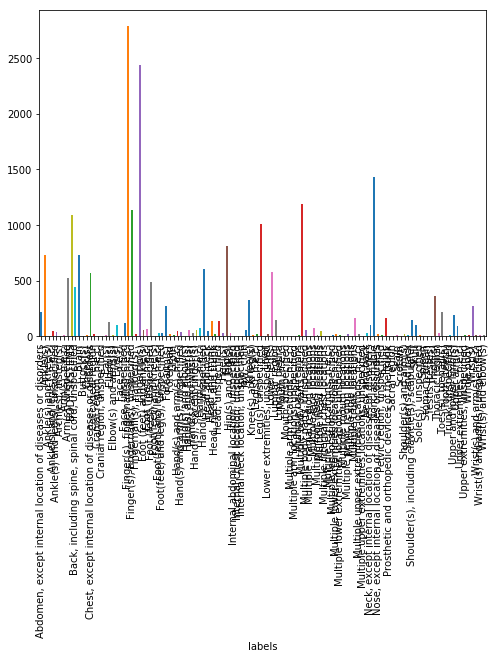

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('labels').texts.count().plot.bar(ylim=0)
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.texts).toarray()
labels = df.category_id
features.shape

(21577, 12260)

In [5]:
from sklearn.feature_selection import chi2
import numpy as np
N = 20
for texts, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(texts))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Abdomen, except internal location of diseases or disorders':
  . Most correlated unigrams:
. sandblasting
. weighed
. lifting
. appliances
. felt
. belly
. joist
. pain
. internal
. rupturing
. ruptured
. aggravated
. kidney
. intestine
. liver
. stomach
. abdominal
. spleen
. abdomen
. hernia
  . Most correlated bigrams:
. struck abdomen
. ribs lacerated
. pain stomach
. employee stomach
. abdominal area
. abdomen hospitalized
. lacerated liver
. lacerated spleen
. suffered abdominal
. ruptured spleen
. abdomen employee
. possible hernia
. abdominal hernia
. stomach area
. hernia employee
. hernia required
. hernia lifting
. sustained hernia
. employee abdomen
. suffered hernia
# 'Ankle(s)':
  . Most correlated unigrams:
. groceries
. mail
. fracturing
. fractured
. leaves
. rolled
. icy
. places
. walking
. surgery
. broke
. breaking
. achilles
. parking
. lot
. slipped
. twisted
. ice
. ankles
. ankle
  . Most correlated bigrams:
. twisted ankle
. rolled ankle
. ankle breaking
. 

# 'Coccygeal region':
  . Most correlated unigrams:
. insulation
. screen
. meeting
. bruised
. bone
. ditch
. conference
. filled
. mopped
. masonry
. staging
. bank
. branch
. sheathing
. rice
. flashing
. garden
. pedestrian
. tail
. tailbone
  . Most correlated bigrams:
. protective equipment
. carrying bucket
. foot high
. hit concrete
. lot injuring
. lot hospitalized
. slipped roof
. tipped forward
. ladder collapsed
. 18 foot
. dismounted ladder
. foot roof
. hatch opening
. opening fell
. falling step
. hospitalized bruised
. scaffold tipped
. cutting branch
. broken tailbone
. tail bone
# 'Cranial region, n.e.c.':
  . Most correlated unigrams:
. slipped
. suffered
. caught
. amputated
. machine
. hand
. hospitalized
. finger
. right
. left
. fell
. head
. working
. floor
. cutting
. concrete
. level
. elevated
. project
. demolition
  . Most correlated bigrams:
. got caught
. employee walking
. requiring hospitalization
. slipped fell
. employee slipped
. employee operating
.

# 'Foot (feet), n.e.c.':
  . Most correlated unigrams:
. riser
. yellow
. estimated
. forklift
. tops
. 38
. trapped
. condenser
. boot
. twice
. stream
. shaped
. lull
. boots
. lance
. confined
. dishwasher
. foot
. metatarsal
. metatarsals
  . Most correlated bigrams:
. hospitalized foot
. 200 degrees
. coil steel
. hoe operator
. backed employee
. load pallets
. foot right
. ankle resulting
. foot smashed
. right foot
. 000 psi
. struck foot
. employee foot
. backed ran
. foot resulting
. left foot
. employee feet
. crushing foot
. amputation foot
. foot amputated
# 'Foot (feet), unspecified':
  . Most correlated unigrams:
. piv
. aisles
. bobcat
. fork
. molten
. operating
. operator
. reach
. yellow
. boot
. boots
. bones
. stand
. run
. standup
. pallet
. jack
. ran
. forklift
. foot
  . Most correlated bigrams:
. pallet jack
. foot got
. foot causing
. foot employee
. foot fractures
. foot breaking
. ran foot
. foot requiring
. broken foot
. foot pinned
. foot resulting
. foot 

# 'Hand(s), unspecified':
  . Most correlated unigrams:
. bitten
. folder
. press
. fuse
. grounded
. energized
. caught
. machine
. rollers
. burns
. laminator
. lacerated
. wound
. infection
. crushed
. infected
. cat
. splinter
. hands
. hand
  . Most correlated bigrams:
. hand fractures
. hand cleaning
. hands hospitalized
. hand surgery
. burns hand
. hand infected
. burns hands
. hand got
. hand requiring
. injured hand
. hand hospitalized
. right hand
. hand lacerated
. suffered hand
. cut hand
. left hand
. hand injury
. hand caught
. hand crushed
. employee hand
# 'Head and neck':
  . Most correlated unigrams:
. slurry
. flame
. crank
. throat
. rivet
. lifeline
. period
. spotter
. burner
. fountain
. plow
. unplugging
. awning
. sled
. flushing
. mouth
. mask
. caustic
. face
. neck
  . Most correlated bigrams:
. rack causing
. possible fractured
. february 11
. cleaning solution
. suffered skull
. neck hospitalized
. fracture neck
. asphalt splashed
. hose struck
. hit neck

# 'Leg(s), n.e.c.':
  . Most correlated unigrams:
. looked
. farm
. chiller
. grain
. watching
. shovel
. machines
. cradle
. bollard
. sanitizing
. owner
. legs
. media
. dumper
. tasked
. grading
. ahead
. blind
. 1000
. disposing
  . Most correlated bigrams:
. abrasion right
. area right
. leg crushed
. crushing breaking
. column employee
. stand powered
. lift fracturing
. struck excavator
. stand lift
. area working
. leg amputation
. solution employee
. working crane
. paint line
. employee machine
. shaft resulting
. burns legs
. machine shop
. employee car
. employee tasked
# 'Leg(s), unspecified':
  . Most correlated unigrams:
. drove
. car
. pinned
. machine
. forklift
. middle
. places
. rolled
. jack
. index
. struck
. fingertip
. amputated
. vehicle
. hand
. finger
. broke
. breaking
. legs
. leg
  . Most correlated bigrams:
. suffered leg
. injured leg
. leg caught
. struck leg
. hospitalized leg
. leg pinned
. leg breaking
. leg employee
. employee legs
. fracturing leg


# 'Multiple face locations':
  . Most correlated unigrams:
. blew
. forehead
. hydroxide
. mouth
. splashing
. loosened
. radiator
. tooth
. faces
. socket
. eye
. orbital
. jaw
. eyes
. facial
. cheekbone
. teeth
. nose
. face
. cheek
  . Most correlated bigrams:
. sprayed face
. hitting face
. employee injuries
. facial bones
. broken teeth
. broken nose
. employee nose
. struck face
. lacerations face
. resulting facial
. suffering facial
. facial fractures
. face suffered
. right cheek
. nose fracture
. left cheek
. teeth fractured
. face fracturing
. fractured nose
. employee face
# 'Multiple foot (feet) locations':
  . Most correlated unigrams:
. bars
. foot
. 32
. noted
. hoisting
. handler
. appointment
. dropping
. seam
. hub
. clipped
. big
. combine
. towing
. toes
. walkie
. directions
. keg
. toe
. logging
  . Most correlated bigrams:
. retrieve tool
. walkie rider
. 30 inch
. distal portion
. pallets forklift
. diameter pipe
. fall fell
. small toe
. fractures employee
. 

# 'Neck and back':
  . Most correlated unigrams:
. assaulted
. cooker
. inmate
. gash
. injuries
. ended
. major
. compressing
. tent
. address
. soon
. boiling
. spine
. snowmobile
. overflowed
. attending
. drywall
. rust
. protector
. neck
  . Most correlated bigrams:
. lifted crane
. slid forks
. fracturing neck
. injured falling
. making rounds
. lifting patient
. hand turn
. debris fell
. tank trailer
. burns neck
. stock employee
. fell story
. february 27
. neck trauma
. neck pain
. neck injury
. suffered neck
. sustained neck
. vertebrae neck
. neck injuries
# 'Neck, except internal location of diseases or disorders':
  . Most correlated unigrams:
. 2014
. future
. shrapnel
. require
. shell
. pneumonia
. threshold
. mortar
. vertebrae
. trap
. wand
. vice
. allen
. herniated
. multi
. disk
. ems
. cervical
. throat
. neck
  . Most correlated bigrams:
. air wand
. vertebrae neck
. cast iron
. pipe saw
. causing neck
. fracture neck
. injuring neck
. spinal injuries
. hospital 

# 'Sole(s), unspecified':
  . Most correlated unigrams:
. sweeping
. sensor
. screw
. security
. tag
. protruding
. accessing
. insulation
. sprinkler
. punctured
. penetrated
. bricks
. boot
. turkey
. nail
. stepped
. sink
. furniture
. juice
. infected
  . Most correlated bigrams:
. infected employee
. wound infected
. foot employee
. later hospitalized
. punctured employee
. 09 2015
. employee spraying
. hospitalized foot
. punctured right
. attempted step
. injury infected
. employee boot
. trailer stepped
. ground using
. hole ground
. laceration infected
. foot required
. nail nail
. moving product
. stepped nail
# 'Spleen':
  . Most correlated unigrams:
. hospitalized
. resulting
. hospitalization
. causing
. ladder
. injured
. lacerated
. way
. snow
. tubing
. ejected
. tube
. ruptured
. crossed
. flip
. spleen
. hill
. attendant
. rode
. lanes
  . Most correlated bigrams:
. employee slipped
. employee working
. employee operating
. employee right
. employee left
. left hand
.

# 'Wrist(s)':
  . Most correlated unigrams:
. fell
. tendons
. encountered
. backward
. bottle
. ladder
. planking
. receive
. intervention
. knife
. aircraft
. ground
. artery
. broke
. braced
. mirror
. telescoping
. tiles
. wrists
. wrist
  . Most correlated bigrams:
. wrist cut
. wrist caught
. wrist surgery
. injured wrist
. fracturing wrists
. breaking wrist
. wrist injury
. fracturing wrist
. wrist fracture
. wrist employee
. broke wrists
. wrist hospitalized
. fractured wrist
. wrist required
. employee wrist
. wrist requiring
. broken wrist
. broke wrist
. right wrist
. left wrist
# 'Wrist(s) and arm(s), n.e.c.':
  . Most correlated unigrams:
. resistant
. cheese
. leaking
. poured
. rolls
. tongue
. caustic
. solution
. bicep
. corrosive
. thermal
. formwork
. significant
. calendar
. forearm
. molds
. groove
. wrist
. sugar
. shape
  . Most correlated bigrams:
. wrist requiring
. ladder sustained
. striking lacerating
. elbow wrist
. arm right
. wrist caught
. using 10
. the

# Visualization  - Experiments

# Future attempt at viz
import numpy as np
import matplotlib.pyplot as plt

#Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# Future attempt at viz

import json
import numpy as np

def load_R_model(filename):
    with open(filename, 'r') as j:
        data_input = json.load(j)
    data = {'topic_term_dists': data_input['phi'], 
            'doc_topic_dists': data_input['theta'],
            'doc_lengths': data_input['doc.length'],
            'vocab': data_input['vocab'],
            'term_frequency': data_input['term.frequency']}
    return data

movies_model_data = load_R_model('data/movie_reviews_input.json')

print('Topic-Term shape: %s' % str(np.array(movies_model_data['topic_term_dists']).shape))
print('Doc-Topic shape: %s' % str(np.array(movies_model_data['doc_topic_dists']).shape))

# Preparing a model for Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['texts'], df['labels'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The mi

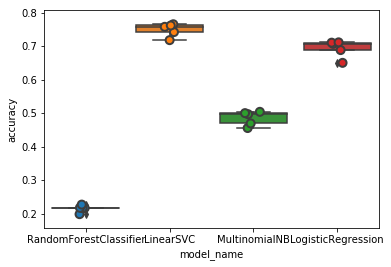

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [8]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.748559
LogisticRegression        0.693038
MultinomialNB             0.484828
RandomForestClassifier    0.215017
Name: accuracy, dtype: float64

In [ ]:
category_id_df

In [ ]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10000:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['labels', 'texts']])
      print('')